# Estudo do dataset Salaries in Data Science - Pablo Gullith

In [34]:
#Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [35]:
#Carregar o conjunto de dados
df = pd.read_csv('ds_salaries.csv')

In [36]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


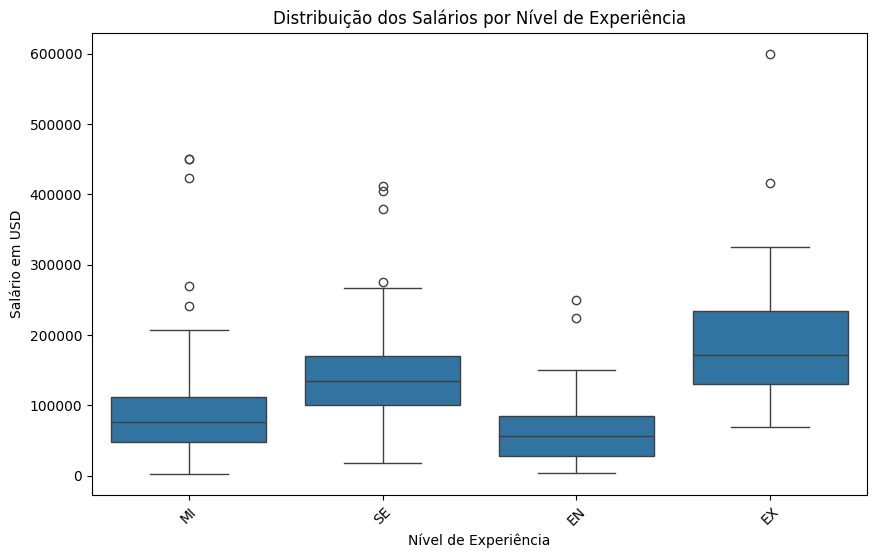

In [37]:
#Plot de distribuição dos salários por nível de experiência
plt.figure(figsize = (10,6))
sns.boxplot(x = 'experience_level', y = 'salary_in_usd', data = df)
plt.title('Distribuição dos Salários por Nível de Experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário em USD')
plt.xticks(rotation = 45)
plt.show()

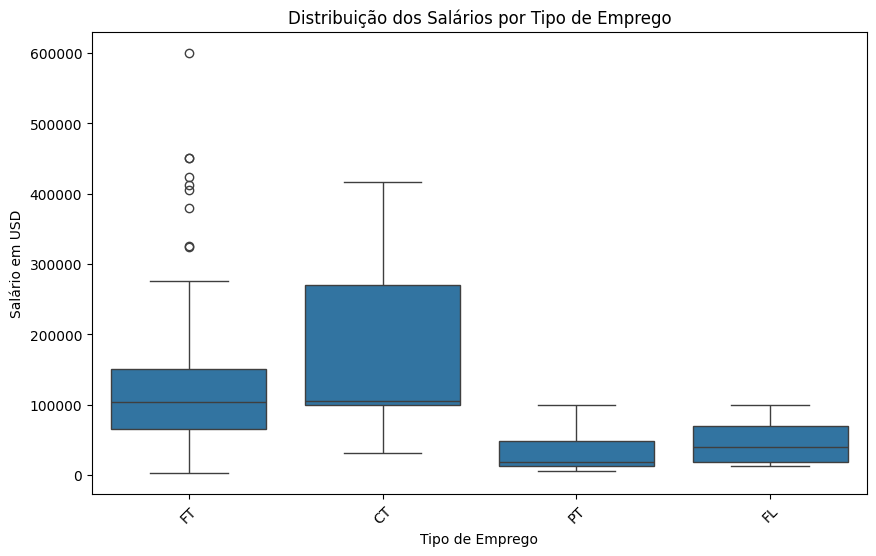

In [7]:
#plot de distribuição dos salários por tipo de emprego
plt.figure(figsize=(10, 6))
sns.boxplot(x='employment_type', y='salary_in_usd', data=df)
plt.title('Distribuição dos Salários por Tipo de Emprego')
plt.xlabel('Tipo de Emprego')
plt.ylabel('Salário em USD')
plt.xticks(rotation=45)
plt.show()

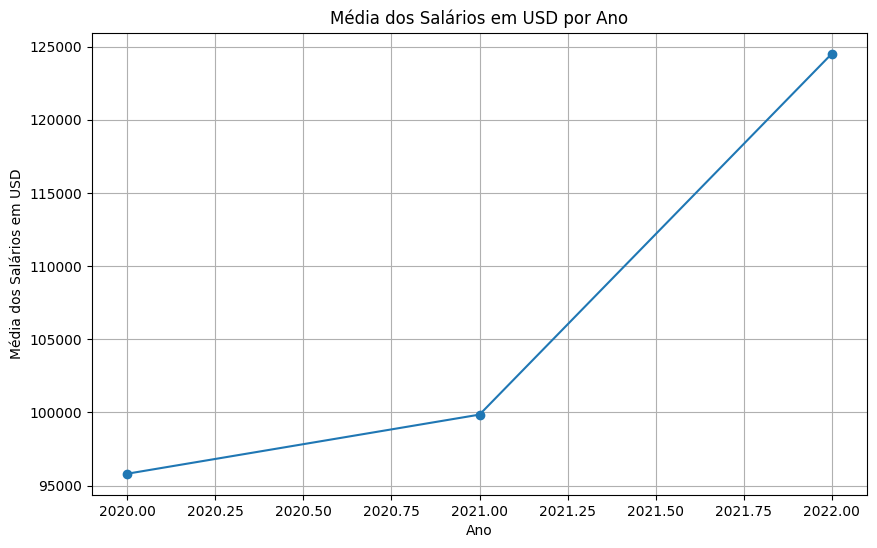

In [8]:
# Converter a coluna 'work_year' para o tipo datetime
df['work_year'] = pd.to_datetime(df['work_year'], format='%Y')

# Calcular a média dos salários em USD por ano
avg_salary_by_year = df.groupby(df['work_year'].dt.year)['salary_in_usd'].mean()

# Plotar o gráfico de média dos salários em USD por ano
plt.figure(figsize=(10, 6))
avg_salary_by_year.plot(kind='line', marker='o')
plt.title('Média dos Salários em USD por Ano')
plt.xlabel('Ano')
plt.ylabel('Média dos Salários em USD')
plt.grid(True)
plt.show()

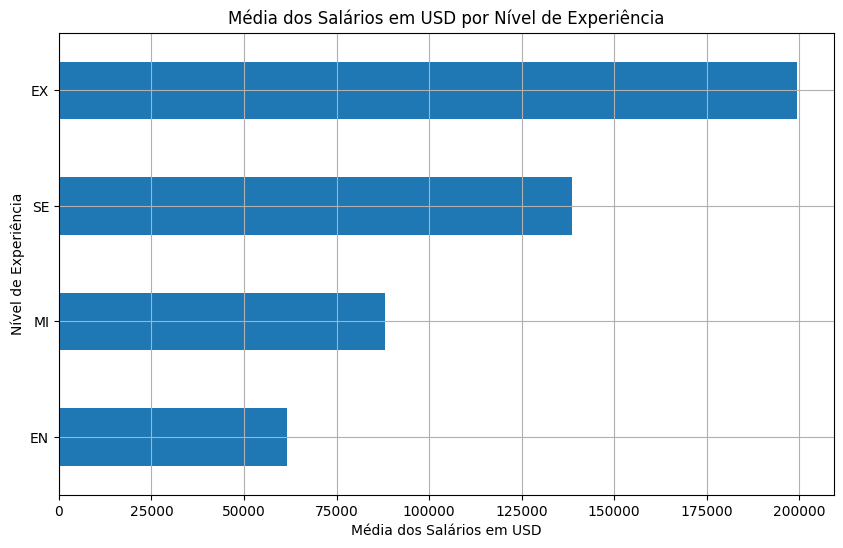

In [9]:
# Calcular a média dos salários em USD por nível de experiência
avg_salary_by_experience = df.groupby('experience_level')['salary_in_usd'].mean().sort_values()

# Plotar o gráfico de média dos salários em USD por nível de experiência
plt.figure(figsize=(10, 6))
avg_salary_by_experience.plot(kind='barh')
plt.title('Média dos Salários em USD por Nível de Experiência')
plt.xlabel('Média dos Salários em USD')
plt.ylabel('Nível de Experiência')
plt.grid(True)
plt.show()

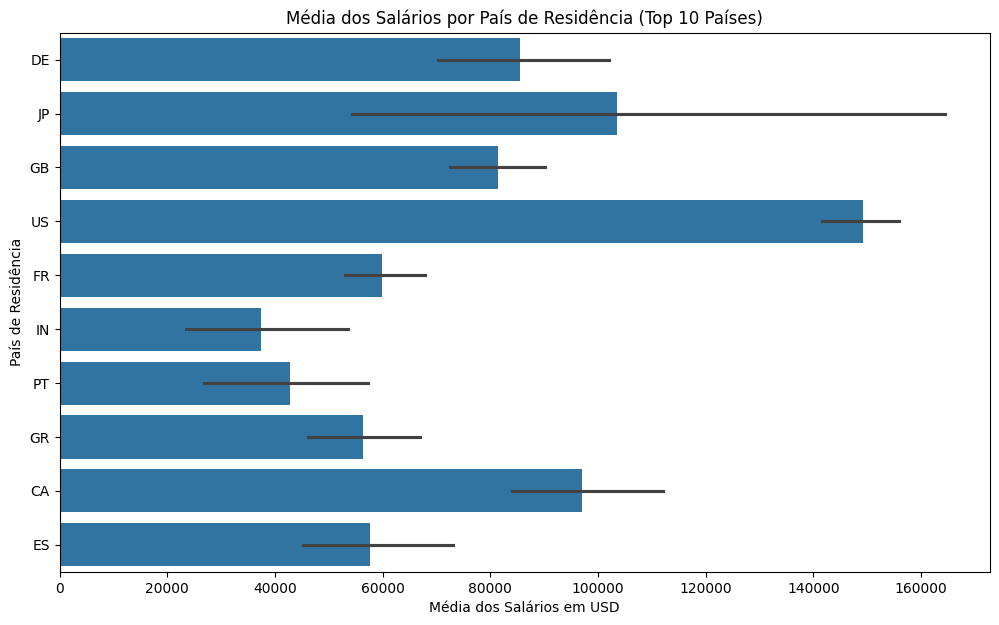

In [17]:
# Filtrar o DataFrame para incluir apenas os top 10 países com as médias mais altas
top_countries = df['employee_residence'].value_counts().nlargest(10).index
df_top_countries = df[df['employee_residence'].isin(top_countries)]

# Plotar o gráfico de média dos salários em USD por país de residência (top 10 países)
plt.figure(figsize=(12, 7))
sns.barplot(x='salary_in_usd', y='employee_residence', data=df_top_countries, estimator=np.mean)
plt.title('Média dos Salários por País de Residência (Top 10 Países)')
plt.xlabel('Média dos Salários em USD')
plt.ylabel('País de Residência')
plt.show()

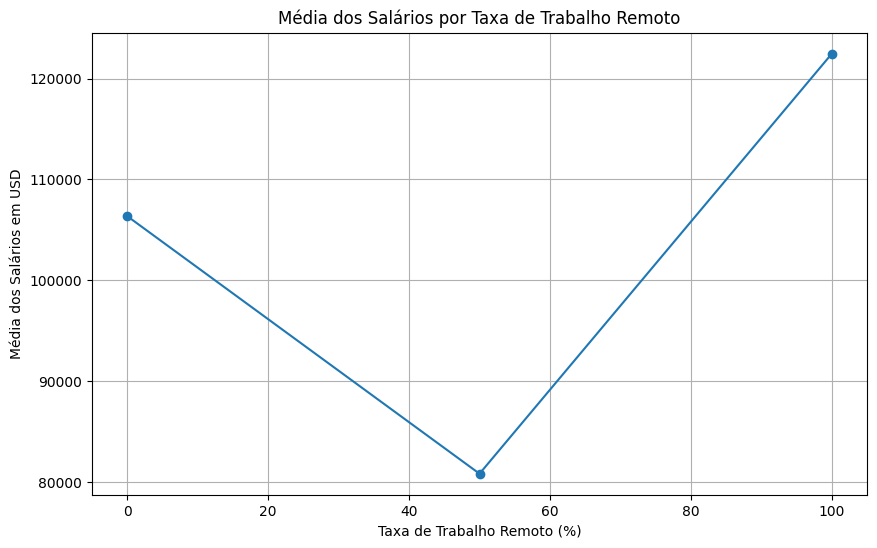

In [18]:
# Calcular a média dos salários em USD por taxa de trabalho remoto
avg_salary_by_remote_ratio = df.groupby('remote_ratio')['salary_in_usd'].mean()

# Plotar o gráfico de média dos salários em USD por taxa de trabalho remoto
plt.figure(figsize=(10, 6))
avg_salary_by_remote_ratio.plot(kind='line', marker='o')
plt.title('Média dos Salários por Taxa de Trabalho Remoto')
plt.xlabel('Taxa de Trabalho Remoto (%)')
plt.ylabel('Média dos Salários em USD')
plt.grid(True)
plt.show()

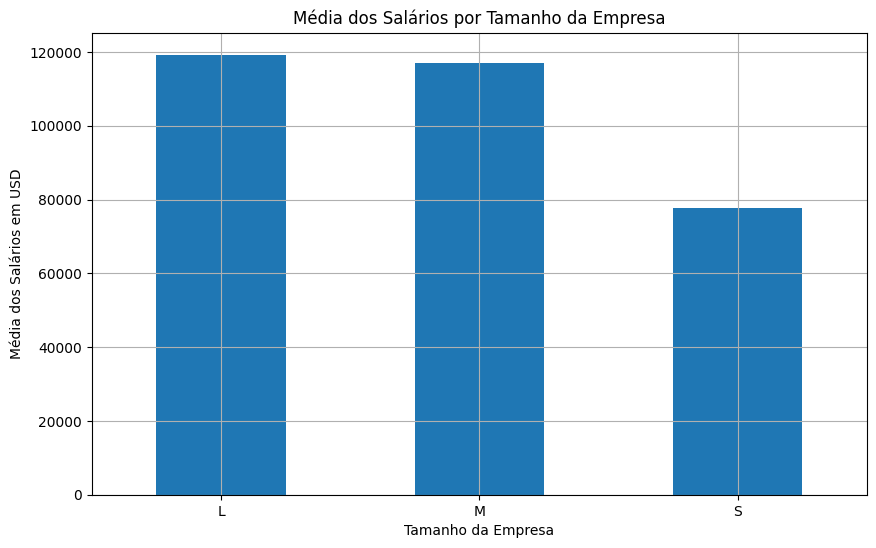

In [19]:
# Calcular a média dos salários em USD por tamanho da empresa
avg_salary_by_company_size = df.groupby('company_size')['salary_in_usd'].mean()

# Plotar o gráfico de média dos salários em USD por tamanho da empresa
plt.figure(figsize=(10, 6))
avg_salary_by_company_size.plot(kind='bar')
plt.title('Média dos Salários por Tamanho da Empresa')
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Média dos Salários em USD')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

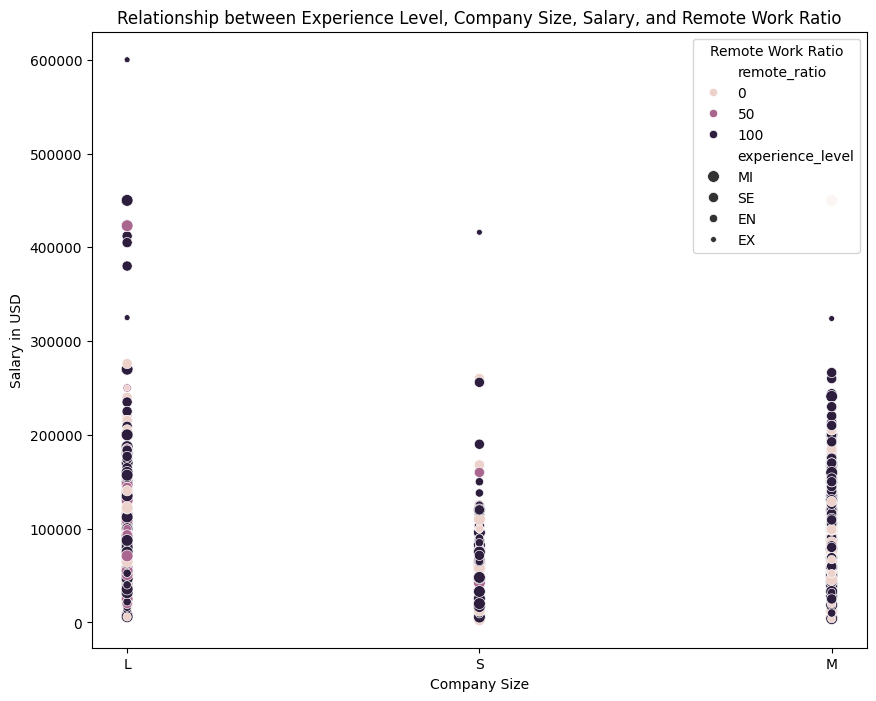

In [20]:
# Filter the DataFrame to include only relevant columns
df_filtered = df[['experience_level', 'company_size', 'salary_in_usd', 'remote_ratio']]

# Plot the scatter plot with remote work ratio as the hue
plt.figure(figsize=(10, 8))
scatter_plot = sns.scatterplot(x='company_size', y='salary_in_usd', hue='remote_ratio', size='experience_level', data=df_filtered)
scatter_plot.set_title('Relationship between Experience Level, Company Size, Salary, and Remote Work Ratio')
scatter_plot.set_xlabel('Company Size')
scatter_plot.set_ylabel('Salary in USD')
scatter_plot.legend(title='Remote Work Ratio')
plt.show()

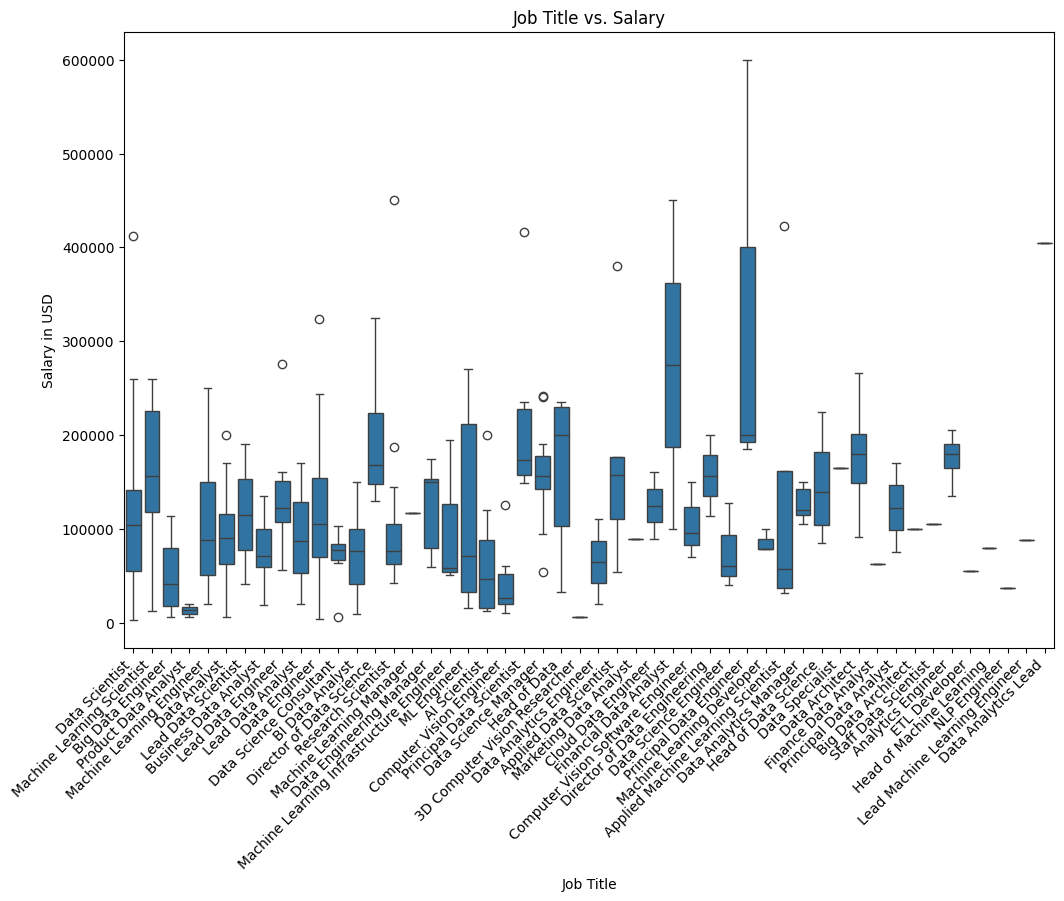

In [27]:
#Plot job title x salary
plt.figure(figsize=(12, 8))
sns.boxplot(x='job_title', y='salary_in_usd', data=df)
plt.title('Job Title vs. Salary')
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45, ha='right')
plt.show()

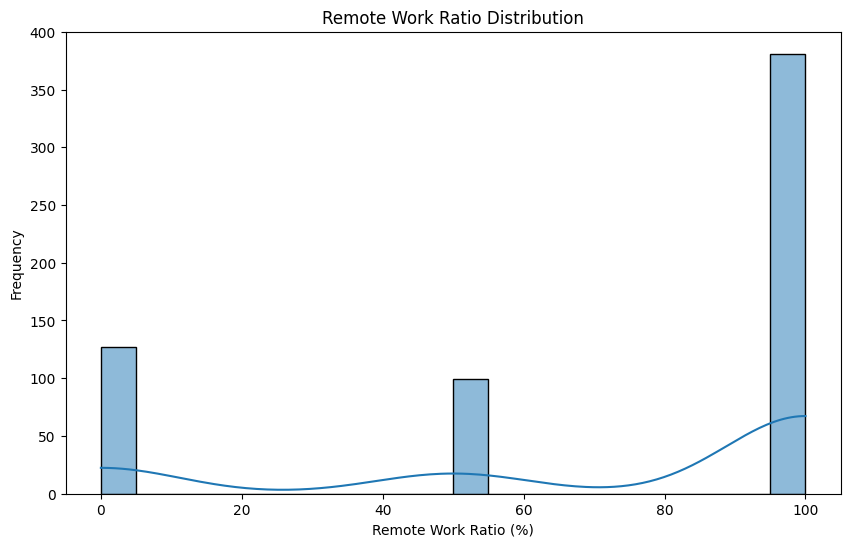

In [30]:
#Plot remote work ratio distribuition
plt.figure(figsize=(10, 6))
sns.histplot(df['remote_ratio'], bins=20, kde=True)
plt.title('Remote Work Ratio Distribution')
plt.xlabel('Remote Work Ratio (%)')
plt.ylabel('Frequency')
plt.show()


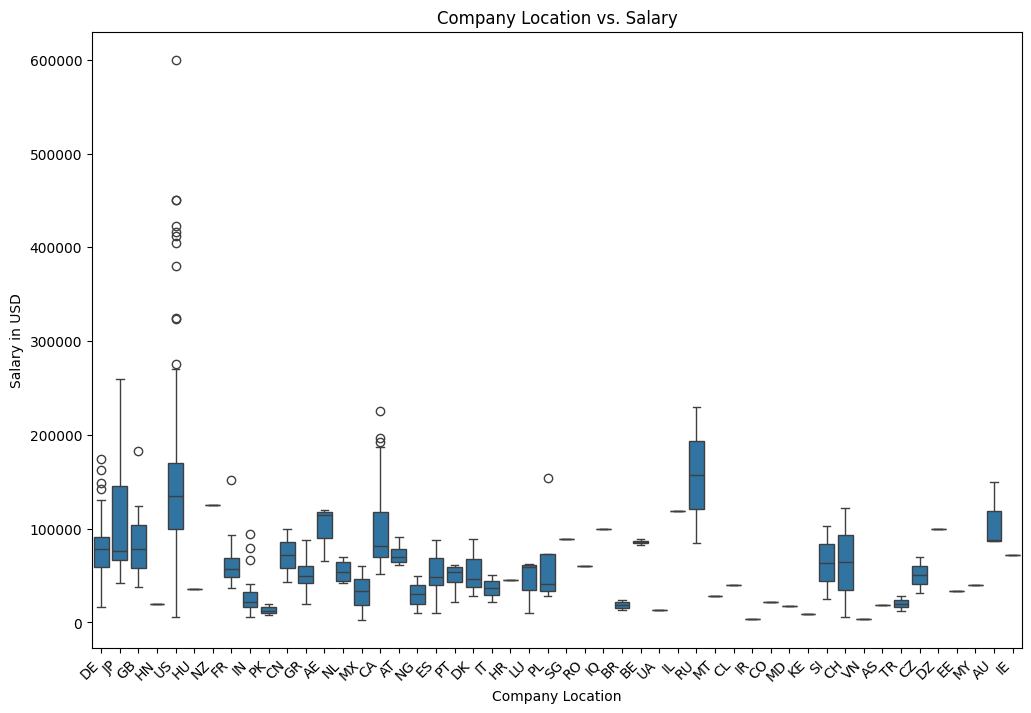

In [31]:
#Plot company location x salary
plt.figure(figsize=(12, 8))
sns.boxplot(x='company_location', y='salary_in_usd', data=df)
plt.title('Company Location vs. Salary')
plt.xlabel('Company Location')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45, ha='right')
plt.show()

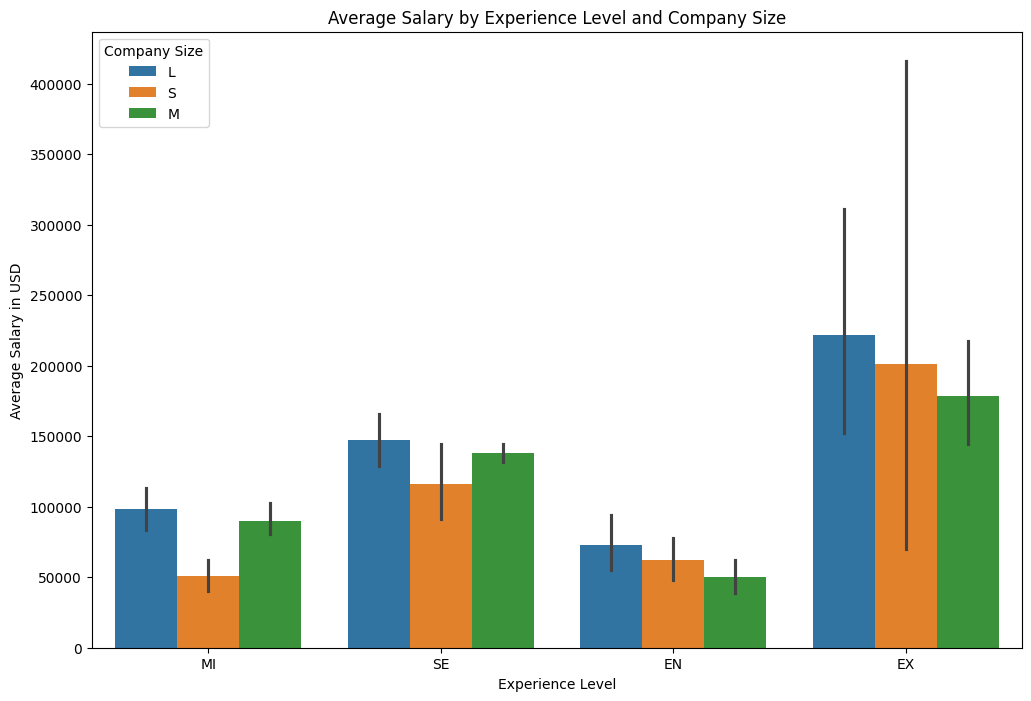

In [33]:
#plot average salary by experience level and company size
plt.figure(figsize=(12, 8))
sns.barplot(x='experience_level', y='salary_in_usd', hue='company_size', data=df)
plt.title('Average Salary by Experience Level and Company Size')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary in USD')
plt.legend(title='Company Size')
plt.show()